In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Make 2D efficiency plots

# First, generate random 2D data points
N = 10000
data = np.random.normal(size=(N,2))
x = data[:, 0]
y = data[:, 1]

# Second, label data points as pass or fail
valid = np.random.binomial(n=1, p=0.9, size=N)
valid = valid.astype(np.bool)

# Third, make denominator and numerator histograms. Then, make eff = denom/numer
nbinsx, nbinsy = 50, 50
xmin, xmax = -5, 5
ymin, ymax = -5, 5

denom_hist, xedges, yedges = np.histogram2d(x, y, bins=(nbinsx, nbinsy), range=((xmin,xmax), (ymin,ymax)))
num_hist, xedges, yedges = np.histogram2d(x[valid], y[valid], bins=(nbinsx, nbinsy), range=((xmin,xmax), (ymin,ymax)))
eff_hist = np.where(denom_hist != 0, np.true_divide(num_hist, denom_hist), 0)

/cvmfs/cms.cern.ch/slc7_amd64_gcc700/external/py2-ipykernel/4.10.0/lib/python2.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


### Make plots

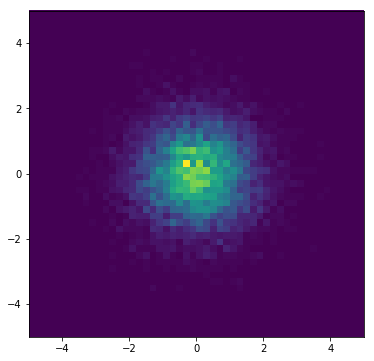

In [3]:
# Denominator
fig, ax = plt.subplots(figsize=(6,6))
_ = ax.hist2d(x, y, bins=(nbinsx, nbinsy), range=((xmin,xmax), (ymin,ymax)))
plt.show()

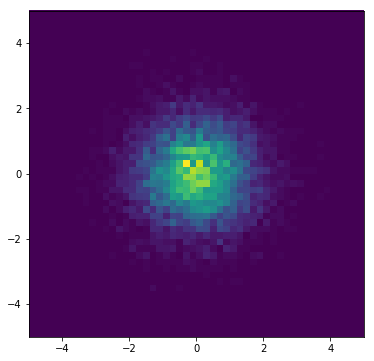

In [4]:
# Numerator
fig, ax = plt.subplots(figsize=(6,6))
_ = ax.hist2d(x[valid], y[valid], bins=(nbinsx, nbinsy), range=((xmin,xmax), (ymin,ymax)))
plt.show()

In [5]:
# matplotlib hist2d takes the (x, y) arrays as input, do the binning and plot.
# this hist2d takes a single, already-binned-in-2d, array as input, and plot.
#
# based on root2matplotlib from rootpy: 
#     http://www.rootpy.org/_modules/rootpy/plotting/root2matplotlib.html#hist2d
#
def hist2d_on_binned_array(eff_hist, xedges, yedges, ax, cmap=None, vmin=None, vmax=None, colorbar=False):
  xdata = (xedges[1:] + xedges[:-1])/2
  ydata = (yedges[1:] + yedges[:-1])/2
  xv, yv = np.meshgrid(xdata, ydata)
  x = xv.ravel()
  y = yv.ravel()
  z = eff_hist.T.ravel()
  h, xedges, yedges, im = ax.hist2d(x, y, weights=z, bins=(xedges, yedges), cmap=cmap, vmin=vmin, vmax=vmax)
  if colorbar:
    cb = ax.figure.colorbar(im, ax=ax)
  return h, xedges, yedges, im

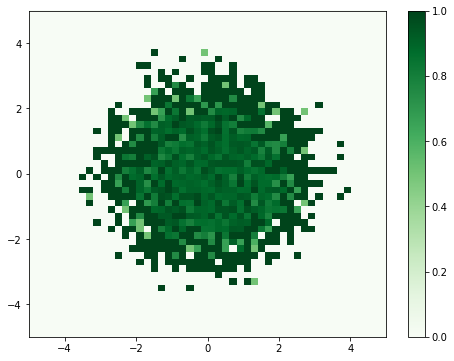

In [6]:
# Efficiency
fig, ax = plt.subplots(figsize=(8,6))
_ = hist2d_on_binned_array(eff_hist, xedges, yedges, ax=ax, cmap=plt.cm.Greens, vmin=0, vmax=1, colorbar=True)
plt.show()

## Debug

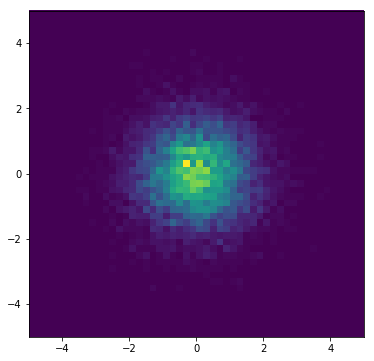

In [7]:
fig, ax = plt.subplots(figsize=(6,6))
h1, xedges1, yedges1, im1 = ax.hist2d(x, y, bins=(nbinsx, nbinsy), range=((xmin,xmax), (ymin,ymax)))
plt.show()

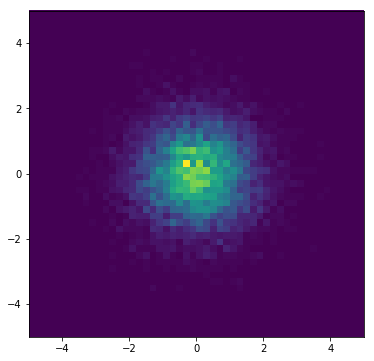

In [8]:
fig, ax = plt.subplots(figsize=(6,6))
h2, xedges2, yedges2, im2 = hist2d_on_binned_array(h1, xedges1, yedges1, ax=ax)
plt.show()

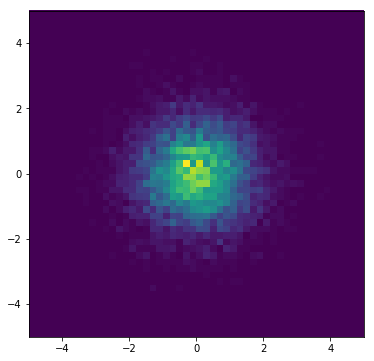

In [9]:
fig, ax = plt.subplots(figsize=(6,6))
h1, xedges1, yedges1, im1 = ax.hist2d(x[valid], y[valid], bins=(nbinsx, nbinsy), range=((xmin,xmax), (ymin,ymax)))
plt.show()

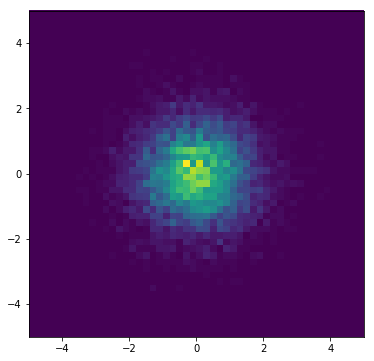

In [10]:
fig, ax = plt.subplots(figsize=(6,6))
h2, xedges2, yedges2, im2 = hist2d_on_binned_array(h1, xedges1, yedges1, ax=ax)
plt.show()